<a href="https://colab.research.google.com/github/saquibali7/VideoFramePrediction/blob/main/FramePredictionDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import os
import cv2
import pickle
import numpy as np
from numpy import savez_compressed
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = '/content/drive/MyDrive/t2_Videos_GAN'
data = os.listdir(data_path)

In [ ]:
image = list()
for i in range(200):
  count = 0
  cap= cv2.VideoCapture(os.path.join(data_path,data[i]))
  temp = []
  while(cap.isOpened()):
    ret, frame = cap.read()
    count+=1
    try:
      img = cv2.resize(frame, (256,256))
      temp.append(img)
    except:
      break
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break
  
  if len(temp) >= 40:
    for i in range(len(temp)-40):
      image.append(temp[i:40+i])
  
  cap.release()
  cv2.destroyAllWindows()    


In [ ]:
image = np.array(image)
print(image.shape)

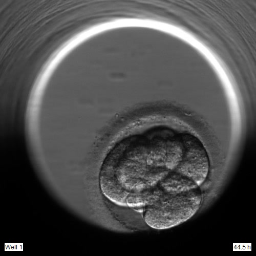

In [144]:
idx = np.random.randint(0,len(image))
cv2_imshow(image[idx][39])

In [145]:
%cd /content/drive/MyDrive
!mkdir framePrediction
%cd framePrediction
filename = '/content/drive/MyDrive/framePrediction/frames.npz'
savez_compressed(filename,image)

/content/drive/MyDrive


In [151]:
from numpy import load
frames = load('frames.npz')
img = img['arr_0']